# Exercise 18

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('/Users/uber/Downloads/E18.xlsx')

# Replace NaN with " "
data = data.fillna(" ")
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [2]:
# Join all the columns into a single one
data['mix'] = data[['T1', 'T2', 'T3', 'T4', 'T5', 'T6']].apply(lambda x: ''.join(x), axis=1)
df = data.loc[:,['Sexo','mix']]
df.head()

,Sexo,mix
0,H,Un científico de datos y un ingeniero de datos...
1,H,Aunque los dos perfiles cuentan con habilidade...
2,H,Python vs Stata. Analizar información es un pr...
3,M,Los algoritmos de machine learning buscan pred...
4,H,Python vs R para análisis de datos. A pesar de...


# Exercise 18.1

Analyze the writing patterns of each student

In [3]:
# Calculate the average lenght of the words in all the texts, it could potentially enhance the model
def avg_word_lenght(sentence):
    words = sentence.split()
    return (sum(len(word)for word in words)/len(words))

df['avg_words'] = df['mix'].apply(lambda x: avg_word_lenght(x))

df['word_count'] = df['mix'].apply(lambda x: len(str(x).split(" ")))

df.head()

,Sexo,mix,avg_words,word_count
0,H,Un científico de datos y un ingeniero de datos...,5.277115,1846
1,H,Aunque los dos perfiles cuentan con habilidade...,5.460137,1321
2,H,Python vs Stata. Analizar información es un pr...,5.283531,1767
3,M,Los algoritmos de machine learning buscan pred...,5.536885,1466
4,H,Python vs R para análisis de datos. A pesar de...,5.150751,1666


In [4]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish') 

df['stopwords'] = df['mix'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

,Sexo,mix,avg_words,word_count,stopwords
0,H,Un científico de datos y un ingeniero de datos...,5.277115,1846,629
1,H,Aunque los dos perfiles cuentan con habilidade...,5.460137,1321,549
2,H,Python vs Stata. Analizar información es un pr...,5.283531,1767,821
3,M,Los algoritmos de machine learning buscan pred...,5.536885,1466,618
4,H,Python vs R para análisis de datos. A pesar de...,5.150751,1666,775


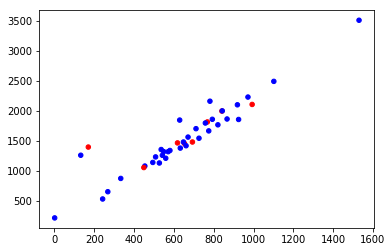

In [5]:
import matplotlib.pyplot as plt

# Scatter plot de word_count vs stopwords

clr = {'M':'red','H':'blue'}
df["color"] = df["Sexo"].apply(lambda x: clr[x])

plt.scatter(y = df.word_count, x = df.stopwords, s= 20, c=df["color"])

According to this graph, male students tend to be more dispersed in terms of stopwords they use. There's one outlier, a student whose almost half of his words are stopwords. 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#bow = CountVectorizer(max_features = 1000, lowercase = True, ngram_range = (1,4), analyzer = 'word')
#train_bow = bow.fit_transform(df.mix)

tfidf = TfidfVectorizer().fit_transform(df.mix)
#train_bow
tfidf

<42x5892 sparse matrix of type '<class 'numpy.float64'>'
	with 23210 stored elements in Compressed Sparse Row format>

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [11]:
# Using cosine similarity two compare each text

#from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(tfidf[0:1], tfidf).flatten()
cosine_similarities

#df2 = df.mix
#df2
#tb = cosine_similarity(train_bow).flatten()
#tb

array([1.        , 0.7080319 , 0.68806194, 0.68315145, 0.68733982,
       0.67198529, 0.43845454, 0.72022712, 0.69667547, 0.7163757 ,
       0.67971295, 0.78581136, 0.70872005, 0.68319567, 0.5935448 ,
       0.45033204, 0.68008225, 0.7323431 , 0.70962727, 0.67783596,
       0.68909146, 0.72949524, 0.65084057, 0.70823146, 0.65092852,
       0.68325451, 0.7235075 , 0.65436555, 0.64971361, 0.7129934 ,
       0.68927874, 0.67285875, 0.69888887, 0.73383415, 0.72820417,
       0.70363278, 0.69170822, 0.72935159, 0.24073437, 0.69601001,
       0.71585408, 0.71456039])

In [12]:
related_docs_indices = cosine_similarities.argsort()[:-5:-1]
related_docs_indices

array([ 0, 11, 33, 17])

The students with the highest cosine similarity are 0, 11, 33 and 17.

# Exercise 18.3

Create a classifier to predict the sex of each student



In [13]:
# TFIDF CountVectorizer
tfidf

<42x5892 sparse matrix of type '<class 'numpy.float64'>'
	with 23210 stored elements in Compressed Sparse Row format>

In [21]:
# use Naive Bayes to predict the sex of a student based on his/her summaries
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
pd.Series(cross_val_score(nb, tfidf, df.Sexo, cv=10)).describe()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


count    10.000000
mean      0.820000
std       0.097753
min       0.750000
25%       0.750000
50%       0.800000
75%       0.800000
max       1.000000
dtype: float64